<a href="https://colab.research.google.com/github/sugengdcahyo/multilabel-classification/blob/main/02-EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import pandas as pd

file_path = '/content/drive/MyDrive/dataset/labeled_hotel_reviews.csv'  # Example:  '/content/drive/MyDrive/Colab Notebooks/your_file.csv'

try:
  df = pd.read_csv(file_path)
  df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
except FileNotFoundError:
  print(f"Error: File not found at {file_path}. Please check the file path.")
except pd.errors.ParserError:
    print(f"Error: Could not parse the CSV file at {file_path}. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


In [16]:
df.head(10)

,review_message,language,meal,service,location,staff,facility,room
0,New hotel in a strategic location in Jakarta. ...,English,not mentioned,positive,positive,not mentioned,not mentioned,not mentioned
1,Nice room dengan amenities yang lengkap. Yang ...,Indonesian,not mentioned,not mentioned,not mentioned,not mentioned,positive,positive
2,Makan di hotel ini sangat menyenangkan! Menu y...,Indonesian,neutral,neutral,not mentioned,not mentioned,not mentioned,neutral
3,"buka bareng rekan disini, makanan enak dan sta...",Indonesian,neutral,neutral,not mentioned,not mentioned,not mentioned,not mentioned
4,Close to the city center,English,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned
5,Hotelnyaa luass bersihhh dan kamarnya sangat n...,Indonesian,neutral,neutral,not mentioned,neutral,not mentioned,neutral
6,nice experience stayed in this hotel,English,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned
7,Pertama kali masuk area lobby sangat nyaman. p...,Indonesian,neutral,neutral,neutral,not mentioned,not mentioned,neutral
8,Very comfortable hotel. Friendly staff. Near t...,English,not mentioned,not mentioned,not mentioned,positive,not mentioned,not mentioned
9,"Stayed 2 nights, room was ok, cleanliness stil...",English,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,positive


In [19]:
df.isnull()

,review_message,language,meal,service,location,staff,facility,room
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
19995,False,False,False,False,False,False,False,False
19996,False,False,False,False,False,False,False,False
19997,False,False,False,False,False,False,False,False
19998,False,False,False,False,False,False,False,False


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('review_message').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

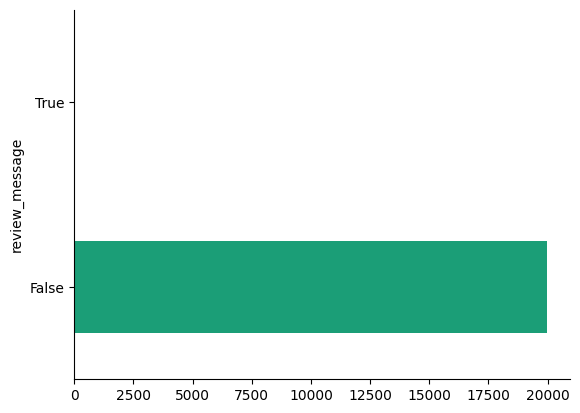

In [20]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('review_message').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [22]:
aspect_columns = ["meal", "service", "location", "staff", "facility", "room"]
df_no_aspect = df[(df[aspect_columns] == "not mentioned").all(axis=1)]


In [23]:
df_no_aspect

,review_message,language,meal,service,location,staff,facility,room
4,Close to the city center,English,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned
6,nice experience stayed in this hotel,English,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned
31,"It's really good, I don't regret choosing to s...",English,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned
50,hari ini ikut iftr dihorison dengan suasana ra...,Indonesian,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned
57,The check-in process took a long time even tho...,English,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned
...,...,...,...,...,...,...,...,...
19964,Seru dan berkesan,English,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned
19965,akan berkunjung kembali,English,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned
19970,Oke semua,English,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned
19975,Baik ...\nSesuai yg d harapkan,English,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned


In [24]:
from textblob import TextBlob

def analyze_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity

    if polarity > 0:
        return "positive"
    elif polarity < 0:
        return "negative"
    else:
        return "neutral"

In [28]:
analyze_sentiment("close to the city center")

'negative'